<a href="https://colab.research.google.com/github/kridtapon/martingale-money-management-strategy/blob/main/martingale_money_management_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

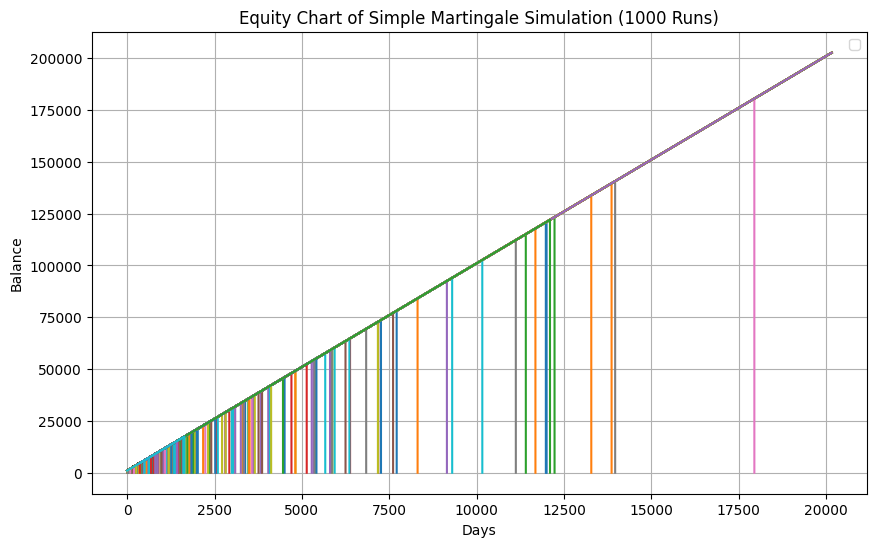

Number of simulations where balance fell below the starting balance: 980


In [ ]:
import random
import matplotlib.pyplot as plt

def simple_martingale_simulation(starting_balance, base_bet, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = base_bet  # Fixed base bet for each round
        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                break  # Stop after a win
            else:  # Loss
                daily_balance -= current_bet
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    daily_balance = 0
                    break
                current_bet *= 2  # Double the bet after a loss

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

        # Stop the simulation early if balance reaches 0
        if balance == 0:
            break

    return results, balance

# Parameters
starting_balance = 1000  # Starting balance
base_bet = 10  # Fixed base bet amount
win_rate = 0.5  # Win rate (50%)
days = 20160  # Total number of days to simulate
num_simulations = 1000  # Number of simulations to run

# Simulate multiple runs and plot each result
plt.figure(figsize=(10, 6))

below_starting_balance_count = 0  # Counter for the number of simulations where balance falls below the starting balance

for i in range(num_simulations):
    results, final_balance = simple_martingale_simulation(starting_balance, base_bet, win_rate, days)
    plt.plot(results)

    # Check if the final balance is below the starting balance
    if final_balance < starting_balance:
        below_starting_balance_count += 1

plt.title('Equity Chart of Simple Martingale Simulation (1000 Runs)')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Print the number of simulations where balance fell below the starting balance
print(f"Number of simulations where balance fell below the starting balance: {below_starting_balance_count}")


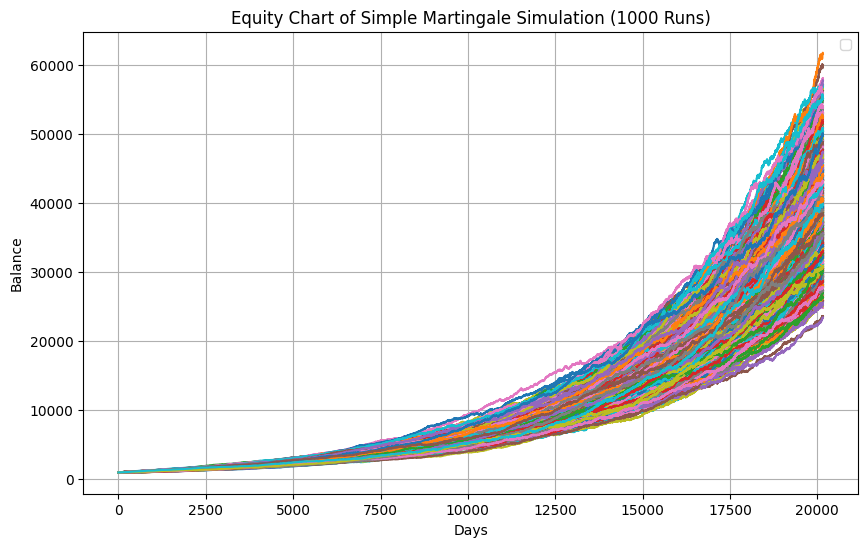

Number of simulations where balance fell below the starting balance: 0


In [ ]:
import random
import matplotlib.pyplot as plt

def simple_martingale_simulation(starting_balance, base_bet_percentage, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = daily_balance * base_bet_percentage  # Calculate bet as a percentage of the current balance
        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                break  # Stop after a win
            else:  # Loss
                daily_balance -= current_bet
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    daily_balance = 0
                    break
                current_bet = min(daily_balance * base_bet_percentage, daily_balance)  # Adjust bet to a percentage of the remaining balance

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

        # Stop the simulation early if balance reaches 0
        if balance == 0:
            break

    return results, balance

# Parameters
starting_balance = 1000  # Starting balance
base_bet_percentage = 0.001  # Base bet as 0.1% of the current balance
win_rate = 0.55  # Win rate (50%)
days = 20160  # Total number of days to simulate
num_simulations = 1000  # Number of simulations to run

# Simulate multiple runs and plot each result
plt.figure(figsize=(10, 6))

below_starting_balance_count = 0  # Counter for the number of simulations where balance falls below the starting balance

for i in range(num_simulations):
    results, final_balance = simple_martingale_simulation(starting_balance, base_bet_percentage, win_rate, days)
    plt.plot(results)

    # Check if the final balance is below the starting balance
    if final_balance < starting_balance:
        below_starting_balance_count += 1

plt.title('Equity Chart of Simple Martingale Simulation (1000 Runs)')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Print the number of simulations where balance fell below the starting balance
print(f"Number of simulations where balance fell below the starting balance: {below_starting_balance_count}")
